In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

filename = 'turnstyle_2016.csv'
# Read subway data from csv into a pandas dataframe
subway_df = pd.read_csv(filename)
# Correct white space on exits
subway_df['Exits'] = subway_df['Exits                                                     ']
del subway_df['Exits                                                     ']
head = subway_df.head()
print "Hello World"

Hello World


In [67]:
print subway_df.head()
print len(subway_df)

    C/A  Unit       SCP Station Line Name Division        Date      Time  \
0  A002  R051  02-00-00   59 ST    NQR456      BMT  03/04/2016  23:00:00   
1  A002  R051  02-00-00   59 ST    NQR456      BMT  03/04/2016  19:00:00   
2  A002  R051  02-00-00   59 ST    NQR456      BMT  03/04/2016  15:00:00   
3  A002  R051  02-00-00   59 ST    NQR456      BMT  03/04/2016  11:00:00   
4  A002  R051  02-00-00   59 ST    NQR456      BMT  03/04/2016  08:10:05   

  Description  Entries    Exits  
0     REGULAR  5572864  1881239  
1     REGULAR  5572521  1881206  
2     REGULAR  5571587  1881113  
3     REGULAR  5571313  1881031  
4     REGULAR  5571173  1880736  
9492670


In [68]:
subway_week = subway_df[subway_df['Date'].isin(['10/31/2016','11/01/2016','11/02/2016','11/03/2016','11/04/2016','11/05/2016','11/06/2016'])]
print subway_week.head()
print len(subway_week)

          C/A  Unit       SCP Station Line Name Division        Date  \
7945848  A013  R081  01-05-00   49 ST      NQRW      BMT  11/03/2016   
7947613  A013  R081  01-05-00   49 ST      NQRW      BMT  11/04/2016   
7951228  A013  R081  01-05-00   49 ST      NQRW      BMT  11/04/2016   
7952926  A013  R081  01-05-00   49 ST      NQRW      BMT  11/04/2016   
7953406  A002  R051  02-00-01   59 ST   NQR456W      BMT  11/02/2016   

             Time Description  Entries    Exits  
7945848  20:00:00     REGULAR      621        0  
7947613  00:00:00     REGULAR      622        0  
7951228  04:00:00     REGULAR      622        0  
7952926  08:00:00     REGULAR      622        0  
7953406  00:00:00     REGULAR  5409973  1187639  
194218


In [69]:
subway_day = subway_df[subway_df['Date'].isin(['11/02/2016'])]
print subway_day.head()
print len(subway_day)
subway_day.to_csv('day_data.csv')

          C/A  Unit       SCP Station Line Name Division        Date  \
7953406  A002  R051  02-00-01   59 ST   NQR456W      BMT  11/02/2016   
7953407  A002  R051  02-00-01   59 ST   NQR456W      BMT  11/02/2016   
7953408  A002  R051  02-00-01   59 ST   NQR456W      BMT  11/02/2016   
7953409  A002  R051  02-00-01   59 ST   NQR456W      BMT  11/02/2016   
7953410  A002  R051  02-00-01   59 ST   NQR456W      BMT  11/02/2016   

             Time Description  Entries    Exits  
7953406  00:00:00     REGULAR  5409973  1187639  
7953407  04:00:00     REGULAR  5409982  1187641  
7953408  08:00:00     REGULAR  5410033  1187679  
7953409  12:00:00     REGULAR  5410183  1187818  
7953410  16:00:00     REGULAR  5410486  1187889  
27296


In [70]:
def hourly(series):
    hourly = series - series.shift(1)
    return hourly

In [75]:
# subway_grouped_hourly = subway_week.groupby('Unit')[['Entries']].apply(hourly).dropna()
# print subway_grouped_hourly.head()
# print subway_grouped_hourly.describe()
# subway_grouped_hourly.to_csv('SUBWAY_GROUPED_HOURLY.csv')
print subway_day.columns
# subway_day['Exits'] = subway_day['Exits                                                     ']
subway_grouped = subway_day.groupby(['Unit', 'SCP'])[['Entries', 'Exits']].apply(hourly)
# remove negatives or crazy values
subway_grouped = subway_grouped.where( 0 <= subway_grouped['Entries'])
subway_grouped = subway_grouped.where(subway_grouped['Entries'] < 100000)
subway_grouped = subway_grouped.where( 0 <= subway_grouped['Exits'])
subway_grouped = subway_grouped.where(subway_grouped['Exits'] < 100000)
subway_grouped = subway_grouped.dropna()
print subway_grouped.describe()
print subway_grouped
# print subway_grouped.describe()


Index([u'C/A', u'Unit', u'SCP', u'Station', u'Line Name', u'Division', u'Date',
       u'Time', u'Description', u'Entries', u'Exits'],
      dtype='object')
            Entries         Exits
count  22512.000000  22512.000000
mean     253.508129    184.261105
std      329.642410    290.747233
min        0.000000      0.000000
25%       15.000000     10.000000
50%      132.000000     75.000000
75%      375.000000    232.000000
max     3011.000000   3718.000000
         Entries  Exits
7953407      9.0    2.0
7953408     51.0   38.0
7953409    150.0  139.0
7953410    303.0   71.0
7953411    812.0   71.0
7953449      6.0    7.0
7953450     18.0  325.0
7953451     64.0  832.0
7953452    137.0  459.0
7953453    314.0  580.0
7953491     16.0   15.0
7953492     48.0  351.0
7953493    159.0  880.0
7953494    299.0  469.0
7953495    595.0  742.0
7953533     25.0    9.0
7953534     48.0  423.0
7953535    194.0  879.0
7953536    305.0  365.0
7953537    699.0  565.0
7953575      8.0    9.0
7953576  

In [76]:
# print type(subway_grouped)
# print subway_grouped

# subway_grouped.to_csv('WHAT.csv')

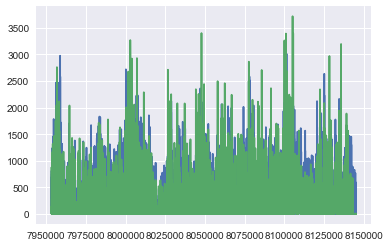

In [77]:
index = subway_grouped.idxmax()
plt.plot(subway_grouped)